In [1]:
%matplotlib inline

In [2]:
pwd

'/mnt/md0/isshamie/Projects/Mito_Trace/workflow/notebooks/CHIP_vars'

RB1060  
117875465	117875465	A	C	exonic	RAD21	nonsynonymous SNV  
117869732	117869732	T	C	intronic	RAD21	NA  
106197631	106197631	A	C	exonic	TET2	synonymous SNV  
31023741	31023741	A	T	exonic	ASXL1	nonsynonymous SNV  


RB1003  
25457243	25457243	G	A	exonic	DNMT3A	nonsynonymous SNV  
25462022	25462022	C	T	exonic	DNMT3A	stopgain  
25463541	25463541	G	C	exonic	DNMT3A	nonsynonymous SNV  
25464501	25464501	G	C	exonic	DNMT3A	nonsynonymous SNV  
43814926	43814926	T	A	intronic	MPL	NA  
119149239	119149239	G	C	exonic	CBL	nonsynonymous SNV  
148512211	148512211	T	C	intronic	EZH2	NA  


In [3]:
#config_f = "config.yaml"
outdir=""

frag_indir = "/home/isaac/lewis/mito_lineage/output/mtscATAC/data/CHIP_dec172021_b1/MTBlacklist_A2/"
samples = "Control,Flt3l,Input"
chip_genes = "TP53,U2AF1,SF3B1,SRSF2,TET2,IDH1,IDH2,DNMT3A"
is_chip_nameerror = False

In [4]:

cells_meta_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/cells_meta.tsv" 
se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/annotation/gff_hg38_1_2/mergedSamples/allSamples.integrated.rds" 
outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/gff_hg38_1_2/annotation_clones"

In [5]:
chip_genes = chip_genes.split(",")
samples = samples.split(",")

samples_dict = {ind+1: val for ind, val in enumerate(samples)}

In [6]:
if is_chip_nameerror:
    single_cell_dirs = {"Flt3l":"Control", "Control":"Flt3l", "Input":"Input"}
else:
    single_cell_dirs = {s:s for s in samples}


In [7]:
samples

['Control', 'Flt3l', 'Input']

In [8]:
import os
if outdir == "":
    outdir="./output"

if not os.path.exists(outdir):
    os.mkdir(outdir)

In [9]:
from src.utils.parse_config import read_config_file
from os.path import join, dirname
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mplh.cluster_help as ch
%load_ext autoreload
%autoreload 2

fig_utils from mplh
here


In [10]:
#config = read_config_file(config_f)
#chip_genes = config["chip_genes"]
#config


### Load:
1. Raw cells barcode w qc info
2. filtered cells barcode list
3. Peak-by-cell sparse matrix
4. Peak gene annotations 
5. Graph clustering filtered cells cluster label
6. TF-by-cell sparse count matrix
7. TF labels

In [11]:
def peaks_gene(df, gene, anno):
    inds = anno[anno["gene"]==gene].index
    df = df.loc[df.index.isin(inds)]
    anno=anno.loc[anno.index.isin(inds)]
    return df, anno

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


categorical True
categorical True


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


loc keys [1.0]
loc keys [1.0, 0.5]
saving


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


categorical True


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


loc keys [1.0, 0.5]
saving


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


categorical True
categorical True


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


loc keys [1.0]
loc keys [1.0, 0.5]
saving


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


categorical True


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


loc keys [1.0, 0.5]
saving


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


categorical True
categorical True


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


loc keys [1.0]
loc keys [1.0, 0.5]
saving


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


categorical True
loc keys [1.0, 0.5]
saving


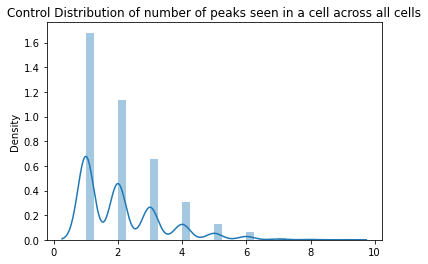

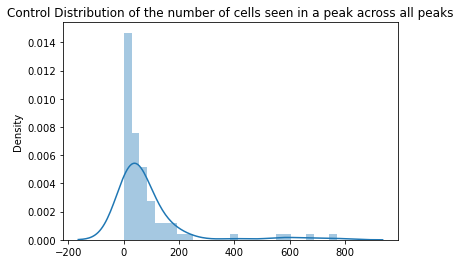

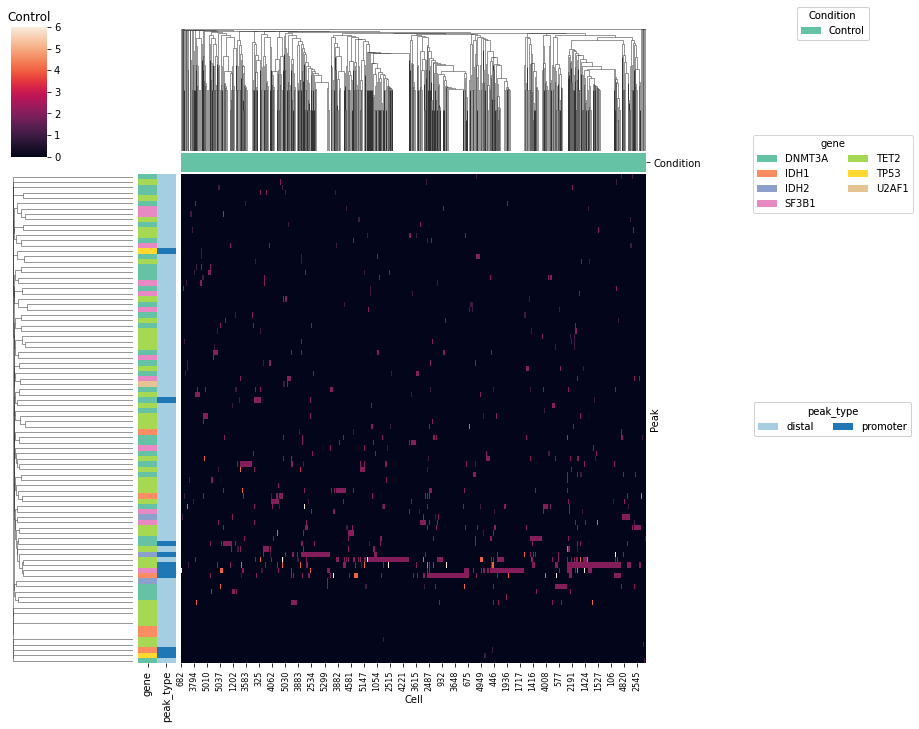

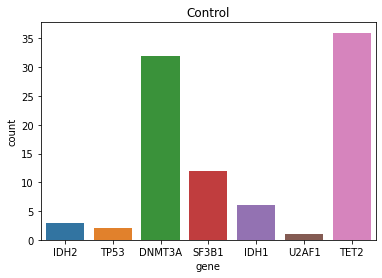

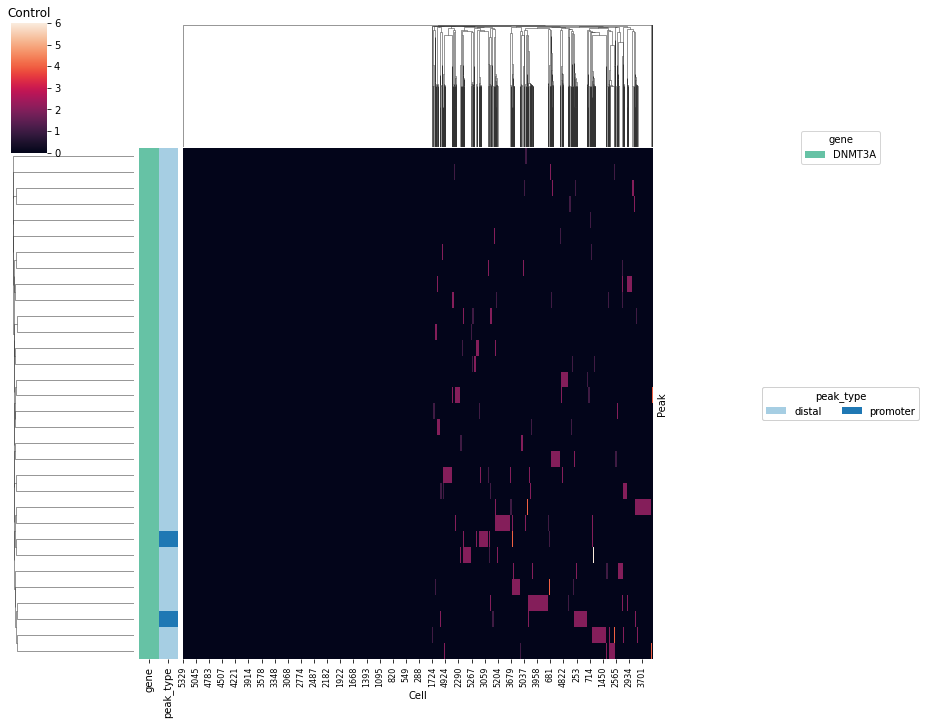

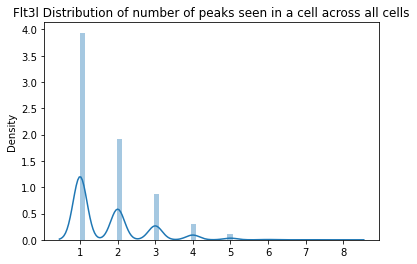

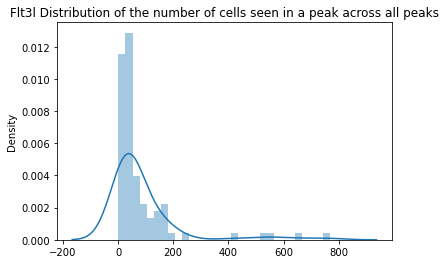

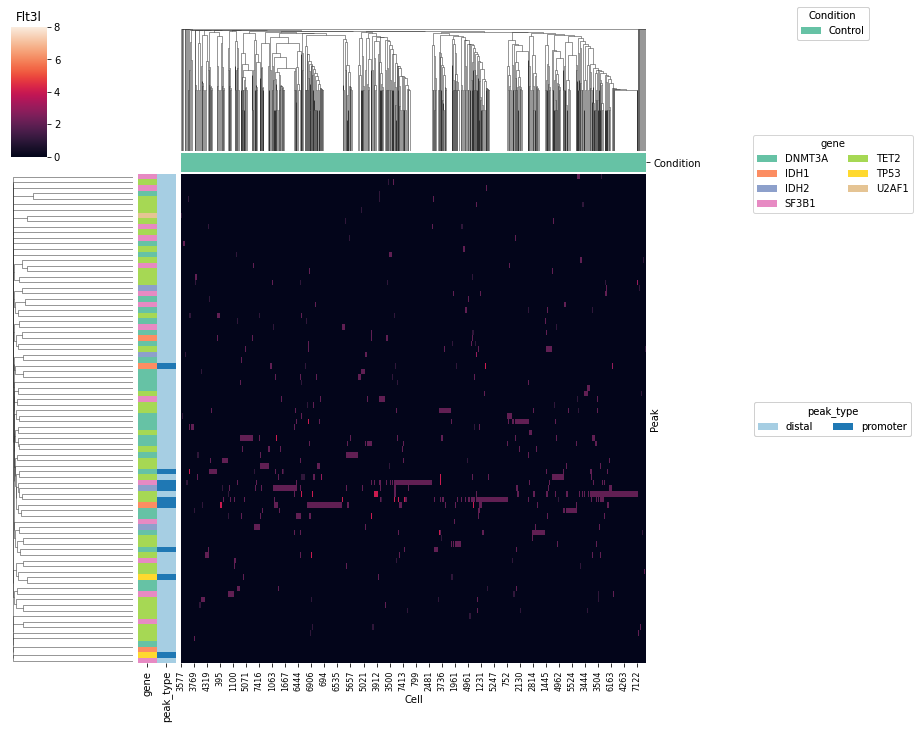

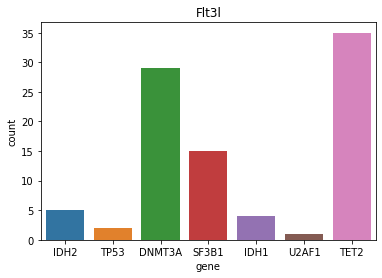

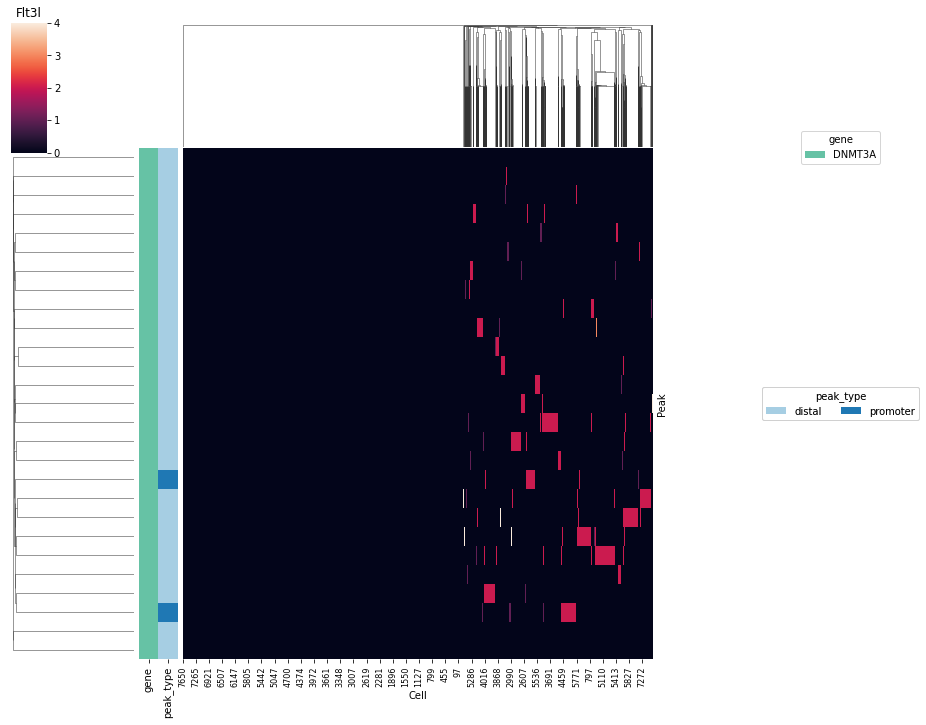

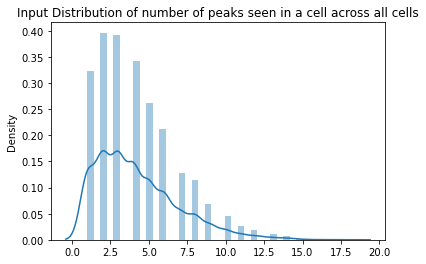

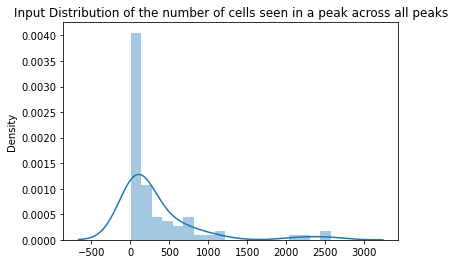

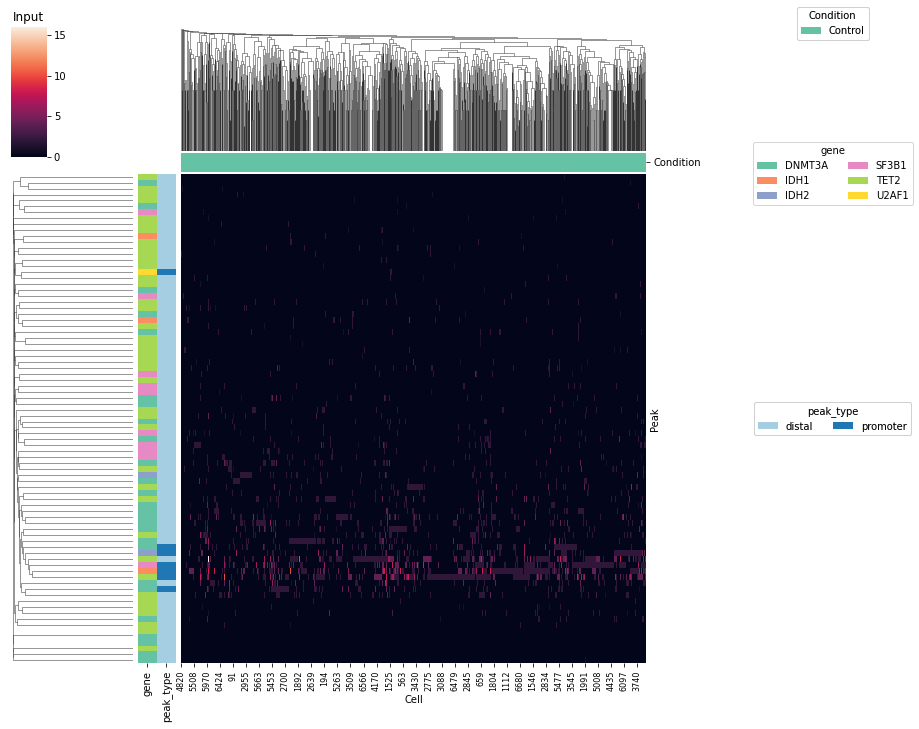

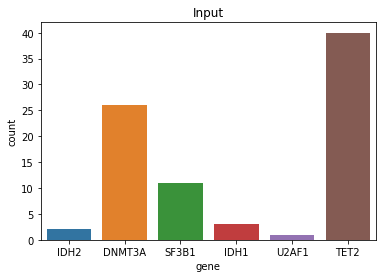

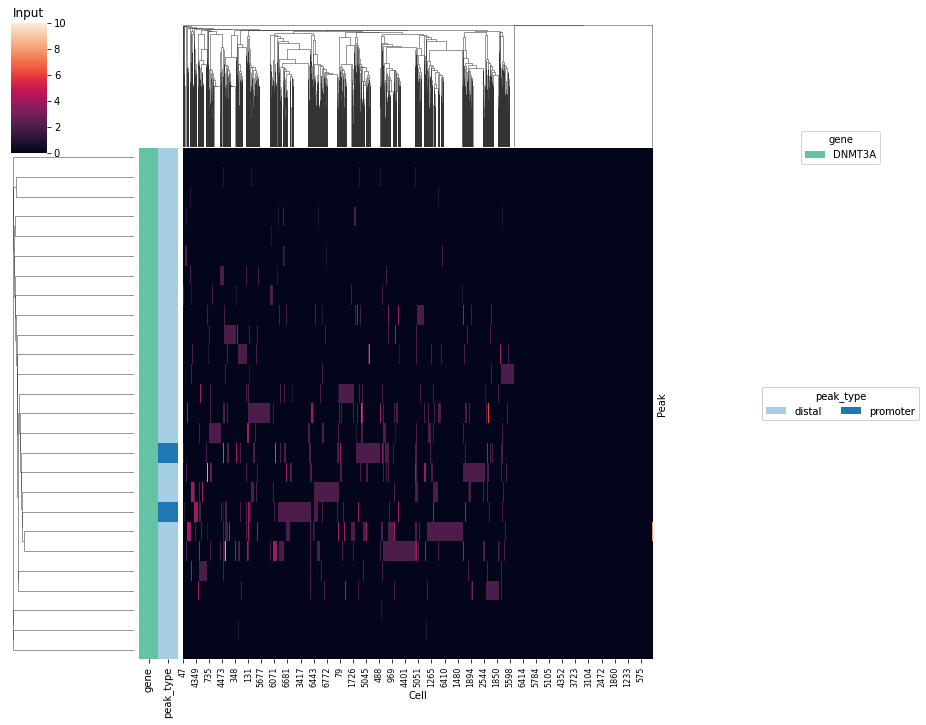

In [12]:
#curr_in = join(config["indir"], config['CBs'][0], 'outs')
for s in samples:
    curr_in = join(frag_indir, s, "outs")
    #CBs = pd.read_csv(join(config["indir"], "barcodes_conditionInfo.csv"), header=None)
    #CBs = CBs.drop(0,axis=1).rename({1:"Condition"}, axis=1)
    #CBs.index=CBs.index+1
    CBs = pd.read_csv(join(frag_indir, single_cell_dirs[s], "outs", "singlecell.csv"))
    CBs = CBs.loc[CBs["barcode"]!= "NO_BARCODE"] ## drop the 'NO_BARCODE'
    CBs.index= CBs.index+1
    CBs["Condition ID"] = CBs["barcode"].apply(lambda x: x.split("-")[-1])
    CBs["Condition"] = CBs["Condition ID"].astype(int).map(samples_dict)
      

    cell_inds = pd.read_csv(join(curr_in, "filtered_peak_bc_matrix","barcodes.tsv"),header=None)
    ## Load peak annotations

    peak_annotations = pd.read_csv(join(curr_in,'peak_annotation.tsv'),sep='\t')
    peak_annotations.index=peak_annotations.index+1
    peak_annotations["gene"] = peak_annotations["gene"].str.upper()
    peak_annotations["Peak"]= peak_annotations.index
    # peak_annotations


    ### Load clusters and add to CBs
    cluster_f = glob(join(curr_in,'analysis',"clustering", "graphclust","clusters.csv"))
    clusters_df = pd.read_csv(cluster_f[0])
    clusters_df.index=clusters_df.index+1

    CBs=pd.concat((CBs,clusters_df), axis=1)
    ## Filter for the chip genes 
    ## Uses peak_annotations
    # Load peaks matrix
    filename = join(curr_in,'filtered_peak_bc_matrix/matrix.mtx')
    peaks_sparse_mtx = pd.read_csv(filename,sep=' ',skiprows=2, header=None).iloc[1:].reset_index(drop=True)
    peaks_sparse_mtx.columns = ["Peak", "Cell", "Count"]

    chip_anno = peak_annotations[peak_annotations["gene"].isin(chip_genes)].set_index("Peak", drop=True).copy()
    chip_anno.head()

    peaks_sparse_mtx = peaks_sparse_mtx.loc[peaks_sparse_mtx["Peak"].isin(chip_anno.index)]
    peaks_sparse_mtx["gene"] = peaks_sparse_mtx["Peak"].map(peak_annotations["gene"])
    peaks_sparse_mtx["Cluster"] = peaks_sparse_mtx["Cell"].map(clusters_df["Cluster"])
    peaks_dense = peaks_sparse_mtx.pivot(index="Peak", columns="Cell",values="Count").fillna(0)
    
    ## The number of cells within a peak and number of peaks within a cell.
    f = plt.figure()
    sns.distplot((peaks_dense>0).sum(axis=0))
    plt.title(f"{s} Distribution of number of peaks seen in a cell across all cells")
    f = plt.figure()
    sns.distplot((peaks_dense>0).sum(axis=1))
    plt.title(f"{s} Distribution of the number of cells seen in a peak across all peaks")
    chip_anno["ID"] = chip_anno.apply(lambda x: x["gene"]+"_"+x["peak_type"]+"_"+x["distance"],axis=1)
    chip_peaks_dense = peaks_dense.loc[peaks_dense.index.isin(chip_anno.index)].copy()

    # Cluster cells by peaks 
    rand_df = chip_peaks_dense.sample(n=1000,axis=1)
    ch.plot_cluster(rand_df.fillna(0), row_meta=chip_anno.loc[rand_df.index,["gene", "peak_type"]], 
                    col_meta=CBs.drop(["Barcode","Cluster"],axis=1).loc[rand_df.columns][["Condition"]], to_row_clust=True, 
                    metric='jaccard', to_legend=True, white_name=None, row_names=False )
    plt.title(s)
    plt.savefig(join(outdir, f"sample_{s}_CHIP_genes_chromatinFragments.png"), bbox_inches='tight')

    ## Countplots for each gene and peak type
    f = plt.figure()
    sns.countplot(chip_anno["gene"])
    plt.title(s)
    plt.savefig(join(outdir, f"sample_{s}_CHIP_genes_counts.png"), bbox_inches='tight')
    
    # Runn for DNMT3A gene
    dnmt3, dnmt3_anno = peaks_gene(chip_peaks_dense, "DNMT3A", chip_anno)
    ch.plot_cluster(dnmt3.fillna(0), row_meta=dnmt3_anno[["gene", "peak_type"]], 
                        to_row_clust=True, 
                        metric='jaccard', to_legend=True, white_name=None, row_names=False )

    plt.title(s)
    plt.savefig(join(outdir, f"sample_{s}_dnmt3a_chromatinFragments.png"), bbox_inches='tight')

